In [18]:
# import the libraries 
import tensorflow as tf
import pandas as pd
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from matplotlib import pyplot


In [19]:
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

def testClassifier(classifier,X_test,y_test):
    y_pred =  classifier.predict(X_test)
    titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),]
    for title, normalize in titles_options:
        disp = ConfusionMatrixDisplay.from_estimator(
            classifier,
            X_test,
            y_test,
            display_labels=None ,
            cmap=plt.cm.Blues,
            normalize=normalize,
        )
        disp.ax_.set_title(title)

        print(title)
        print(disp.confusion_matrix)

    plt.show()
    print("Accuracy score : " + str(accuracy_score(y_test, y_pred,  normalize=True, sample_weight=None)))
#     X = np.concatenate((X_train, X_test), axis=0) 
#     y = np.concatenate((y_train, y_test), axis=0)
#     scores = cross_val_score(classifier,X,y,cv=5)
#     print("Mean accuracy of 5 fold cross validation test : "+ str(scores.mean()))
#     print("with a maximum accuracy of " + str(scores.max()))
#     scores = cross_val_score(classifier,X,y,cv=10)
#     print("Mean accuracy of 10 fold cross validation test : "+ str(scores.mean()))
#     print("with a maximum accuracy of " + str(scores.max()))
#     scores = cross_val_score(classifier,X,y,cv=KFold(85))
#     print("Mean accuracy of n fold cross validation test : "+ str(scores.mean()))
#     print("with a maximum accuracy of " + str(scores.max()))
#     scores = cross_val_score(classifier,X,y,cv=KFold())
#     print("Mean accuracy of n fold cross validation test : "+ str(scores.mean()))
#     print("with a maximum accuracy of " + str(scores.max()))

In [39]:
from sklearn.model_selection import train_test_split
dataframe = pd.read_csv('KeyboardData.csv')
X = dataframe.iloc[:,:-1].values
y = dataframe.iloc[:,-1].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,stratify=y)

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings

warnings.filterwarnings("ignore")
#Define an instance of PCA 
pca = PCA()
# Define a Standard Scaler to normalize inputs
scaler = StandardScaler()
estimator = []

estimator.append(('svm', SVC( probability = True)))
estimator.append(('GNB',GaussianNB()))
estimator.append(('kn',KNeighborsClassifier()))
estimator.append(('lda',LinearDiscriminantAnalysis()))

vot_hard = VotingClassifier(estimators = estimator)



pipe = Pipeline([
    ('scaler', scaler),
    ("pca", pca),
    ('vot_hard', vot_hard )
])

params = {
            'pca__n_components' : [7,8],
          'vot_hard__svm__C': [0.094,2,3,4],
          'vot_hard__svm__gamma' : [1,0.1,0.01,0.052],
          'vot_hard__kn__n_neighbors': [7,8,9,10],
        'vot_hard__voting':['hard','soft']
         
         }
gridvoting = GridSearchCV(pipe, params, refit = True, verbose = 0,cv=10)
grid_voting_result=gridvoting.fit(X_train,y_train)

# print best parameter after tuning
print(grid_voting_result.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid_voting_result.best_estimator_)


grid_predictions = grid_voting_result.predict(X_test)
 
# print classification report
print(classification_report(y_test, grid_predictions))
scores_voting = evaluate_model(grid_voting_result.best_estimator_,X,y)

{'pca__n_components': 8, 'vot_hard__kn__n_neighbors': 8, 'vot_hard__svm__C': 4, 'vot_hard__svm__gamma': 0.01, 'vot_hard__voting': 'hard'}
Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=8)),
                ('vot_hard',
                 VotingClassifier(estimators=[('svm',
                                               SVC(C=4, gamma=0.01,
                                                   probability=True)),
                                              ('GNB', GaussianNB()),
                                              ('kn',
                                               KNeighborsClassifier(n_neighbors=8)),
                                              ('lda',
                                               LinearDiscriminantAnalysis())]))])
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         9
           1       1.00      0.62      0.77         8

    accuracy                           0.82        17
   

Confusion matrix, without normalization
[[9 0]
 [3 5]]
Normalized confusion matrix
[[1.    0.   ]
 [0.375 0.625]]


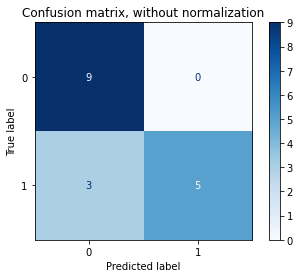

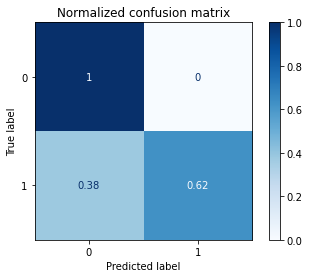

Accuracy score : 0.8235294117647058


In [23]:
testClassifier(grid_voting_result.best_estimator_,X_test,y_test)

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import warnings

warnings.filterwarnings("ignore")
#Define an instance of PCA 
pca = PCA()
# Define a Standard Scaler to normalize inputs
scaler = StandardScaler()
estimator = []
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC




pipe = Pipeline([
    ('scaler', scaler),
    ("pca", pca),
    ('model',BaggingClassifier(base_estimator=SVC()))
   
])

params = {
            'pca__n_components' : [6,7,8],
            'model__n_estimators': [1 ,10,100],
            'model__base_estimator__C': [0.001,0.01,0.1,2,3,4],
            'model__bootstrap': [True, False],
            
           
         }
grid3 = GridSearchCV(pipe, params, verbose = 1,cv=5)
grid_result3= grid3.fit(X_train,y_train)


 
# print how our model looks after hyper-parameter tuning
print(grid_result3.best_estimator_)


grid_predictions = grid3.predict(X_test)
 
# print classification report
print(classification_report(y_test, grid_predictions))

print("Best: %f using %s" % (grid_result3.best_score_, grid_result3.best_params_))
means = grid_result3.cv_results_['mean_test_score']
stds = grid_result3.cv_results_['std_test_score']
params = grid_result3.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=6)),
                ('model',
                 BaggingClassifier(base_estimator=SVC(C=2), n_estimators=1))])
              precision    recall  f1-score   support

           0       0.64      0.78      0.70         9
           1       0.67      0.50      0.57         8

    accuracy                           0.65        17
   macro avg       0.65      0.64      0.64        17
weighted avg       0.65      0.65      0.64        17

Best: 0.721978 using {'model__base_estimator__C': 2, 'model__bootstrap': True, 'model__n_estimators': 1, 'pca__n_components': 6}


In [25]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
dataframe = pd.read_csv('KeyboardData.csv')
X = dataframe.iloc[:,:-1].values
y = dataframe.iloc[:,-1].values

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size = 0.2,stratify=y)
warnings.filterwarnings("ignore")

pca = PCA()
# Define a Standard Scaler to normalize inputs
scaler = StandardScaler()
gbm = GradientBoostingClassifier()
pipe = Pipeline([
    ('scaler', scaler),
    ("pca", pca),
    ('gbm', gbm )
])
param_grid = {
    'pca__n_components' : [6,7,8,9],
    'gbm__learning_rate': [0.001,0.01],
    'gbm__n_estimators': [1000,2000],
    'gbm__criterion': ['friedman_mse', 'squared_error'],
#     "gbm__max_features":["log2","sqrt"],
    "gbm__min_samples_split": np.linspace(0.1, 0.5, 12),
#     "gbm__max_depth":[3,5,8],
    
             }
 
grid2 = GridSearchCV(pipe, param_grid, verbose = 0,cv=10)
# fitting the model for grid search
grid_result2= grid2.fit(X_train,y_train)


 
# print how our model looks after hyper-parameter tuning
print(grid_result2.best_estimator_)


grid_predictions = grid2.predict(X_test)
 
# print classification report
print(classification_report(y_test, grid_predictions))

print("Best: %f using %s" % (grid_result2.best_score_, grid_result2.best_params_))
means = grid_result2.cv_results_['mean_test_score']
stds = grid_result2.cv_results_['std_test_score']
params = grid_result2.cv_results_['params']

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=8)),
                ('gbm',
                 GradientBoostingClassifier(learning_rate=0.01,
                                            min_samples_split=0.390909090909091,
                                            n_estimators=1000))])
              precision    recall  f1-score   support

           0       0.70      0.78      0.74         9
           1       0.71      0.62      0.67         8

    accuracy                           0.71        17
   macro avg       0.71      0.70      0.70        17
weighted avg       0.71      0.71      0.70        17

Best: 0.733333 using {'gbm__criterion': 'friedman_mse', 'gbm__learning_rate': 0.01, 'gbm__min_samples_split': 0.390909090909091, 'gbm__n_estimators': 1000, 'pca__n_components': 8}


In [26]:
scores3=evaluate_model(grid_result2.best_estimator_,X,y)
print(scores3)

[0.66666667 0.66666667 0.66666667 0.66666667 0.77777778 0.625
 0.625      0.5        0.625      0.125      0.77777778 0.44444444
 0.88888889 0.88888889 0.77777778 0.625      0.75       0.875
 0.5        0.625      1.         0.77777778 0.66666667 0.44444444
 0.44444444 0.75       0.625      0.875      0.875      0.625     ]


Confusion matrix, without normalization
[[7 2]
 [3 5]]
Normalized confusion matrix
[[0.77777778 0.22222222]
 [0.375      0.625     ]]


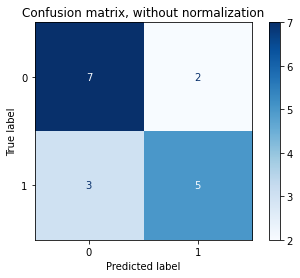

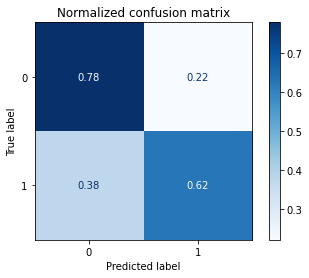

Accuracy score : 0.7058823529411765


In [27]:
testClassifier(grid_result2.best_estimator_,X_test,y_test)

In [28]:
scores2=evaluate_model(grid_result2.best_estimator_,X,y)
print(scores2)

[0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.625
 0.625      0.5        0.625      0.125      0.77777778 0.44444444
 0.88888889 0.88888889 0.77777778 0.625      0.75       0.875
 0.5        0.625      1.         0.77777778 0.66666667 0.44444444
 0.44444444 0.75       0.625      0.875      0.875      0.625     ]


Confusion matrix, without normalization
[[7 2]
 [3 5]]
Normalized confusion matrix
[[0.77777778 0.22222222]
 [0.375      0.625     ]]


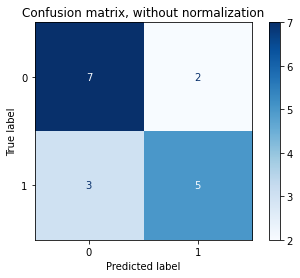

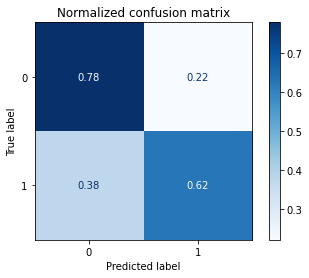

Accuracy score : 0.7058823529411765


In [29]:
testClassifier(grid_result2.best_estimator_,X_test,y_test)

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings

warnings.filterwarnings("ignore")
#Define an instance of PCA 
pca = PCA()
# Define a Standard Scaler to normalize inputs
scaler = StandardScaler()
estimator = []

estimator.append(('svm', SVC( probability = True)))
estimator.append(('kn',KNeighborsClassifier()))
estimator.append(('lda',LinearDiscriminantAnalysis()))
estimator.append(('GNB',GaussianNB()))
# estimator.append(('lr', LogisticRegression( )))
# estimator.append(('gbm', GradientBoostingClassifier() ))

vot_hard = VotingClassifier(estimators = estimator)



pipe = Pipeline([
    ('scaler', scaler),
    ("pca", pca),
    ('vot_hard', vot_hard )
])

params = {
            'pca__n_components' : [8],
          'vot_hard__svm__C': [4],
#             'vot_hard__lr__C': [0.01,0.1,0.5,1.0, 100.0],
          'vot_hard__svm__gamma' : [0.01],
          'vot_hard__kn__n_neighbors': [8],
        'vot_hard__voting':['soft']
         
         }
grid1 = GridSearchCV(pipe, params, refit = True, verbose = 0,cv=10)
grid_results1=grid1.fit(X_train,y_train)

# print best parameter after tuning
print(grid1.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid1.best_estimator_)


grid_predictions = grid1.predict(X_test)
# print classification report
print(classification_report(y_test, grid_predictions))

{'pca__n_components': 8, 'vot_hard__kn__n_neighbors': 8, 'vot_hard__svm__C': 4, 'vot_hard__svm__gamma': 0.01, 'vot_hard__voting': 'soft'}
Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=8)),
                ('vot_hard',
                 VotingClassifier(estimators=[('svm',
                                               SVC(C=4, gamma=0.01,
                                                   probability=True)),
                                              ('kn',
                                               KNeighborsClassifier(n_neighbors=8)),
                                              ('lda',
                                               LinearDiscriminantAnalysis()),
                                              ('GNB', GaussianNB())],
                                  voting='soft'))])
              precision    recall  f1-score   support

           0       0.82      1.00      0.90         9
           1       1.00      0.75      0.86         8

    accu

[[0.85955584 0.14044416]
 [0.73449279 0.26550721]
 [0.17059116 0.82940884]
 [0.21538823 0.78461177]
 [0.79573906 0.20426094]
 [0.72270619 0.27729381]
 [0.85954956 0.14045044]
 [0.05600514 0.94399486]
 [0.607526   0.392474  ]
 [0.4148093  0.5851907 ]
 [0.35559556 0.64440444]
 [0.57311891 0.42688109]
 [0.81930605 0.18069395]
 [0.37224765 0.62775235]
 [0.75178449 0.24821551]
 [0.78139701 0.21860299]
 [0.31819384 0.68180616]]


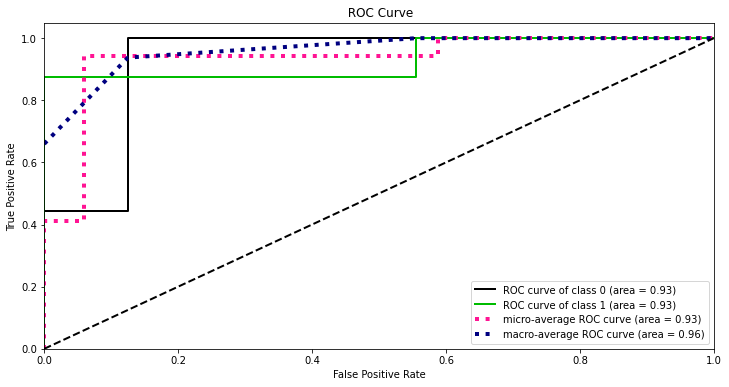

In [49]:
import scikitplot as skplt
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,stratify=y)
Y_test_probs = grid1.predict_proba(X_test)
print(Y_test_probs)
skplt.metrics.plot_roc_curve(y_test, Y_test_probs,
                       title=" ROC Curve", figsize=(12,6));

In [ ]:
testClassifier(grid_results1.best_estimator_,X_test,y_test)

In [ ]:
# compare hard voting to standalone classifiers
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from matplotlib import pyplot



In [ ]:
scores1=evaluate_model(grid_results1.best_estimator_,X,y)

In [ ]:
print(scores1)

In [ ]:
print(scores2)

In [ ]:
scores1 = [0.88888889, 0.88888889, 0.88888889, 0.77777778, 1.0,         0.875,
 0.625,      0.875,      0.875,      0.25,       1.0,         0.44444444,
 0.77777778, 0.77777778, 1.0,         0.625,      0.875,      0.875,
 0.875,      0.625,      0.88888889, 0.88888889, 0.77777778, 0.77777778,
 0.77777778, 0.75 ,      0.75,       1.,         0.75,       0.5,       ]

In [73]:
scores3=[0.5, 0.5, 0.66666667, 0.77777778, 0.94, 0.625,
 0.75,       0.75,       0.875,      0.5,      0.66666667, 0.44444444,
 0.77777778, 0.77777778, 0.88888889, 0.625  ,    0.875 ,     0.75,
 1.0,         0.5     ,   0.88888889 ,0.66666667, 0.55555556 ,0.66666667,
 0.77777778, 0.5  ,      0.8   ,   0.875  ,    0.75  ,     0.625     ]
print(np.mean(scores3))
print(np.std(scores3))

0.7098518526666667
0.1482802607450038


In [ ]:
results = [scores1,scores3,scores2]
pyplot.boxplot(results, labels=["Voting classifier",'Bagging classifier','gbm'], showmeans=True)
pyplot.show()

In [72]:
scores4 = [1, 0.77777778, 0.94, 0.94, 0.6, 0.75,
 0.625,      0.625,      0.75,0.875, 0.8,
 0.66, 0.77777778, 0.88888889, 0.5,        0.625,      0.75,
 0.75,       0.80,      1.0,         0.77777778, 0.825, 0.90,
 0.7, 0.625,      0.7,      1.0,         0.7,      0.88,     ]
print(np.mean(scores4))
print(np.std(scores4))

0.7773180079310343
0.12977606784690568


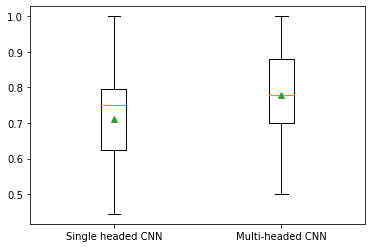

In [71]:
results = [scores3,scores4]
pyplot.boxplot(results, labels=["Single headed CNN",'Multi-headed CNN'], showmeans=True)
pyplot.show()

In [ ]:
results = [scores1,scores3,scores_voting]
pyplot.boxplot(results, labels=["Voting classifier",'Bagging classifier','Gradient Boosting'], showmeans=True)
pyplot.show()